In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # Uyarıyı kapatır
import warnings
# Tüm uyarıları görmezden gel
warnings.filterwarnings('ignore')

In [ ]:
main_df = pd.read_csv("/content/drive/MyDrive/MyWorkSpace/Technical Analysis/THY Stock Price History.csv")
main_df = main_df.iloc[::-1].reset_index(drop=True)
main_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/20/2025,305.75,305.00,306.00,301.75,27.88M,0.74%
1,01/21/2025,301.25,304.25,305.50,299.75,24.19M,-1.47%
2,01/22/2025,305.25,301.75,305.75,300.50,23.40M,1.33%
3,01/23/2025,309.75,306.00,311.75,303.00,38.92M,1.47%
4,01/24/2025,309.00,310.00,311.00,306.00,25.72M,-0.24%


In [ ]:
main_df.shape

(251, 7)

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      251 non-null    object 
 1   Price     251 non-null    float64
 2   Open      251 non-null    float64
 3   High      251 non-null    float64
 4   Low       251 non-null    float64
 5   Vol.      251 non-null    object 
 6   Change %  251 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.9+ KB


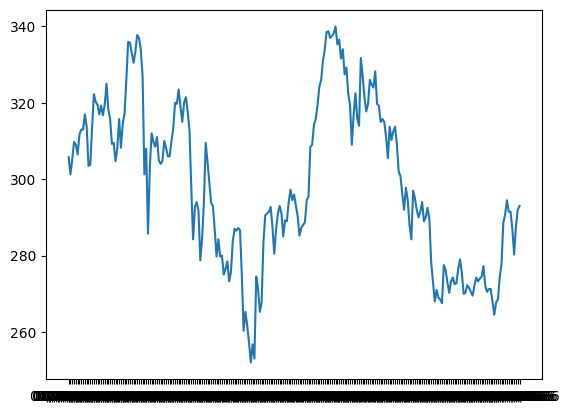

In [ ]:
plt.plot(main_df["Date"],main_df["Price"])

# Veri Hazırlama

In [ ]:
df = main_df[['Price','Date']]
print(df.head())
print(df.tail())

    Price        Date
0  305.75  01/20/2025
1  301.25  01/21/2025
2  305.25  01/22/2025
3  309.75  01/23/2025
4  309.00  01/24/2025
      Price        Date
246  287.00  01/13/2026
247  280.25  01/14/2026
248  287.75  01/15/2026
249  292.00  01/16/2026
250  293.00  01/19/2026


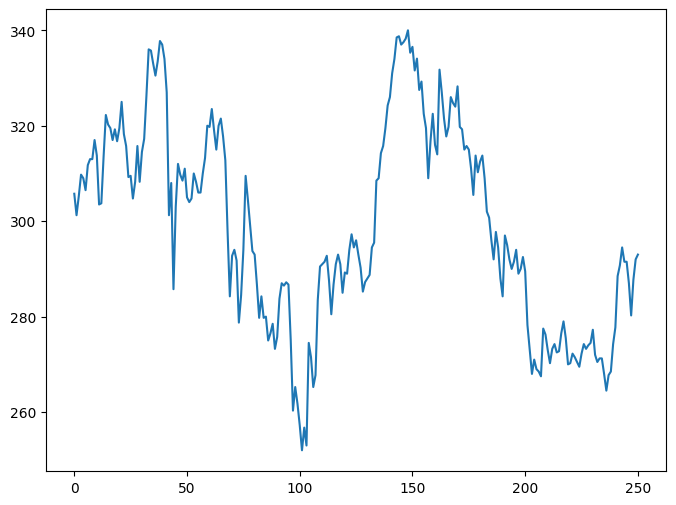

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df.index,df["Price"])

In [ ]:
size = df.shape[0]
# 0.8 - 0.2 oranı
Train = df.iloc[:int(size*4/5)]
Test = df.iloc[int(size*4/5):]
print(Train.shape, Test.shape)

(200, 2) (51, 2)


In [ ]:
Train.head(10)

,Price,Date
0,305.75,01/20/2025
1,301.25,01/21/2025
2,305.25,01/22/2025
3,309.75,01/23/2025
4,309.00,01/24/2025
5,306.50,01/27/2025
6,311.75,01/28/2025
7,313.00,01/29/2025
8,313.00,01/30/2025
9,317.00,01/31/2025


In [ ]:
prediction_days = 10

Temp_Train = Train.drop(columns="Date").iloc[prediction_days:].copy()

for p in range(prediction_days):
  Temp_Train[f"d-{p+1}"] = None

for s in range(Temp_Train.shape[0]):
  for ni in range(prediction_days,0,-1):
      Temp_Train.iloc[s, Temp_Train.columns.get_loc(f"d-{ni}")] = Train["Price"].iloc[prediction_days - ni + s]

for col in Temp_Train.columns:
  Temp_Train[col] = Temp_Train[col].astype(float)

Train = Temp_Train
Train.head()

,Price,d-1,d-2,d-3,d-4,d-5,d-6,d-7,d-8,d-9,d-10
10,313.75,317.00,313.00,313.00,311.75,306.50,309.00,309.75,305.25,301.25,305.75
11,303.50,313.75,317.00,313.00,313.00,311.75,306.50,309.00,309.75,305.25,301.25
12,303.75,303.50,313.75,317.00,313.00,313.00,311.75,306.50,309.00,309.75,305.25
13,313.50,303.75,303.50,313.75,317.00,313.00,313.00,311.75,306.50,309.00,309.75
14,322.25,313.50,303.75,303.50,313.75,317.00,313.00,313.00,311.75,306.50,309.00


In [ ]:
print(Train.head())
print(Train.tail())

     Price     d-1     d-2     d-3     d-4     d-5     d-6     d-7     d-8  \
10  313.75  317.00  313.00  313.00  311.75  306.50  309.00  309.75  305.25   
11  303.50  313.75  317.00  313.00  313.00  311.75  306.50  309.00  309.75   
12  303.75  303.50  313.75  317.00  313.00  313.00  311.75  306.50  309.00   
13  313.50  303.75  303.50  313.75  317.00  313.00  313.00  311.75  306.50   
14  322.25  313.50  303.75  303.50  313.75  317.00  313.00  313.00  311.75   

       d-9    d-10  
10  301.25  305.75  
11  305.25  301.25  
12  309.75  305.25  
13  309.00  309.75  
14  306.50  309.00  
     Price    d-1    d-2    d-3    d-4     d-5     d-6     d-7     d-8  \
195  291.5  290.0  292.0  295.0  297.0  284.25  288.00  294.50  297.75   
196  294.0  291.5  290.0  292.0  295.0  297.00  284.25  288.00  294.50   
197  289.0  294.0  291.5  290.0  292.0  295.00  297.00  284.25  288.00   
198  290.0  289.0  294.0  291.5  290.0  292.00  295.00  297.00  284.25   
199  292.5  290.0  289.0  294.0  29

(251.0, 341.0)

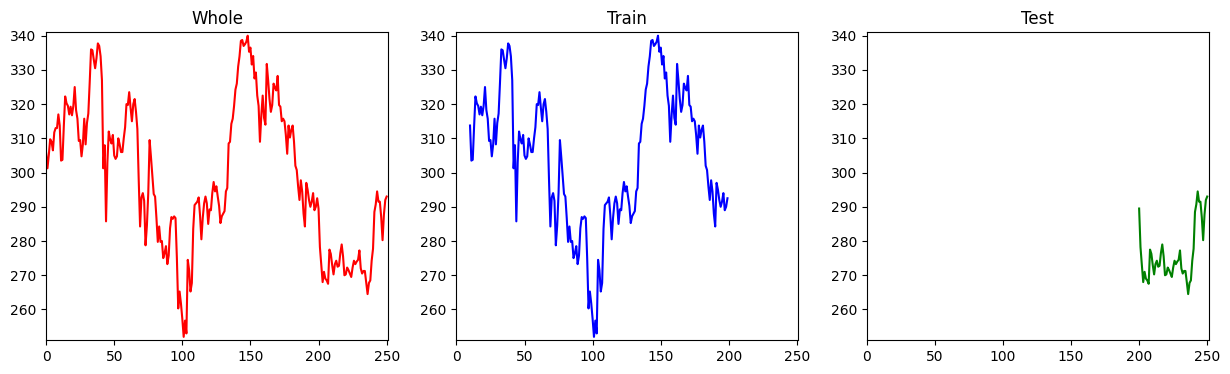

In [ ]:
x = np.linspace(0, 10, 100)
max_val = df["Price"].max()
min_val = df["Price"].min()
max_ind = df.shape[0]
# nrows=1 olduğu için sadece tek indeks yeterli: axes[0], axes[1]...
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot(df["Price"], 'r')
axes[0].set_title('Whole')
axes[0].set_xlim(0,max_ind)
axes[0].set_ylim(min_val-1,max_val+1)

axes[1].plot(Train["Price"], 'b')
axes[1].set_title('Train')
axes[1].set_xlim(0,max_ind)
axes[1].set_ylim(min_val-1,max_val+1)

axes[2].plot(Test["Price"], 'g')
axes[2].set_title('Test')
axes[2].set_xlim(0,max_ind)
axes[2].set_ylim(min_val-1,max_val+1)

In [ ]:
Train.to_csv("Train.csv")

# Model Eğitimi

In [ ]:
X_train = Train.drop(columns="Price")
y_train = Train["Price"]
print(X_train.shape, y_train.shape)

(190, 10) (190,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
Test

,Price,Date
200,289.50,11/07/2025
201,278.25,11/10/2025
202,273.00,11/11/2025
203,268.00,11/12/2025
204,271.00,11/13/2025
205,269.00,11/14/2025
206,268.50,11/17/2025
207,267.50,11/18/2025
208,277.50,11/19/2025
209,276.25,11/20/2025


In [ ]:
size = Test.shape[0]

last_index = Train.index[-1]
prediction_index = range(int(last_index) + 1, int(last_index) + 1 + size)

preds = pd.Series(index=prediction_index, name="Price_Forecast", dtype=float)

prev = Train.iloc[-1].drop("Price")
prev = prev.shift(1)
prev.iloc[0] = Train.iloc[-1]["Price"]

for i in range(size):
    pred = lr_model.predict(prev.values.reshape(1, -1))[0]
    preds.iloc[i] = pred
    prev = prev.shift(1)
    prev.iloc[0] = pred

print(preds.head())

200    292.055204
201    292.293544
202    292.967688
203    293.883321
204    294.102412
Name: Price_Forecast, dtype: float64


In [ ]:
preds

,Price_Forecast
200,292.055204
201,292.293544
202,292.967688
203,293.883321
204,294.102412
205,294.140757
206,295.118634
207,295.417658
208,295.448330
209,295.739664


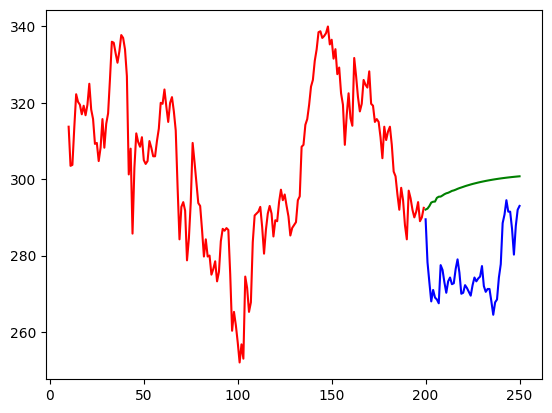

In [ ]:
plt.plot(Train.index,Train["Price"], 'r')
plt.plot(Test.index,Test["Price"], 'b')
plt.plot(preds.index,preds, 'g')